# Imports

In [5]:
import sys
import os

# Add the parent directory (Project) to the Python path
sys.path.append(os.path.abspath(".."))

# Now you can import general_functions
from general_funcs import *
import cv2 as cv
from skimage.segmentation import active_contour
import matplotlib.pyplot as plt

# Level Set

## Functions

## Testing

### Active Counter Model

In [16]:
# Adjust the path to point to the 'Img' directory in the parent folder
img_path = os.path.join('..', 'Img')

# Filter and process gtmasks directories
gtmasks_dirs = list(filter(lambda dname: dname.endswith('gtmasks'), os.listdir(img_path)))
gtmasks_dirs = sorted(gtmasks_dirs, key=lambda dname: int(dname.split('_')[3]))
gtmasks_dict = {dname: os.listdir(os.path.join(img_path, dname)) for dname in gtmasks_dirs}

# Print the keys of gtmasks_dict
gtmasks_dict.keys()

dict_keys(['wire_images_video_1_gtmasks', 'wire_images_video_2_gtmasks', 'wire_images_video_3_gtmasks', 'wire_images_video_4_gtmasks', 'wire_images_video_5_gtmasks', 'wire_images_video_6_gtmasks', 'wire_images_video_7_gtmasks', 'wire_images_video_8_gtmasks'])

In [14]:
# Adjust the path to point to the parent directory where 'Img' is located
base_path = os.path.abspath('..')  # Get the parent directory
img_path = os.path.join(base_path, 'Img')  # Construct the path to 'Img'

# Filter and process image directories
image_dirs = list(filter(lambda dname: dname[-1].isdigit(), os.listdir(img_path)))
image_dirs = sorted(image_dirs, key=lambda dname: int(dname[-1]))
images_dict = {dname: os.listdir(os.path.join(img_path, dname)) for dname in image_dirs}

images_dict

{'wire_images_video_1': ['wire1_ultrasound_watertank.png',
  'wire2_ultrasound_watertank.png',
  'wire3_ultrasound_watertank.png',
  'wire4_ultrasound_watertank.png',
  'wire5_ultrasound_watertank.png',
  'wire6_ultrasound_watertank.png'],
 'wire_images_video_2': ['wire10_ultrasound_watertank.png',
  'wire11_ultrasound_watertank.png',
  'wire12_ultrasound_watertank.png',
  'wire13_ultrasound_watertank.png',
  'wire14_ultrasound_watertank.png',
  'wire15_ultrasound_watertank.png',
  'wire16_ultrasound_watertank.png',
  'wire17_ultrasound_watertank.png',
  'wire18_ultrasound_watertank.png',
  'wire19_ultrasound_watertank.png',
  'wire20_ultrasound_watertank.png',
  'wire21_ultrasound_watertank.png',
  'wire22_ultrasound_watertank.png',
  'wire23_ultrasound_watertank.png',
  'wire7_ultrasound_watertank.png'],
 'wire_images_video_3': ['wire24_ultrasound_watertank.png',
  'wire25_ultrasound_watertank.png',
  'wire26_ultrasound_watertank.png',
  'wire27_ultrasound_watertank.png',
  'wire28_u

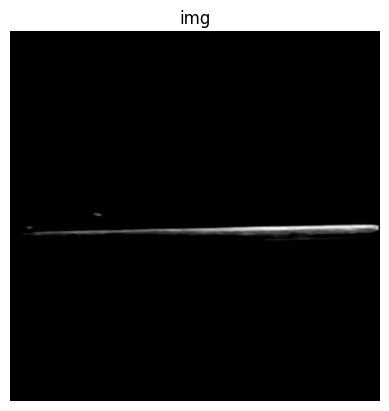

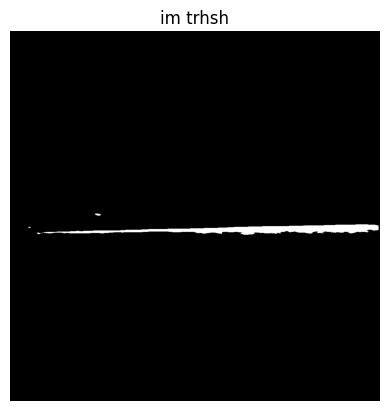

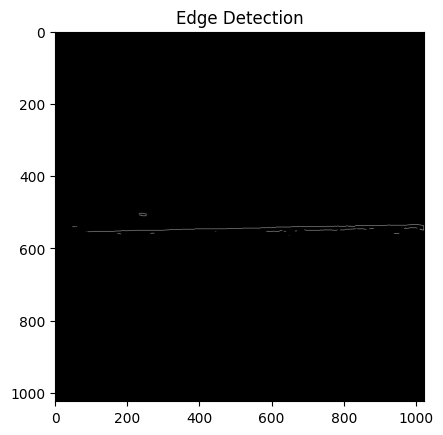

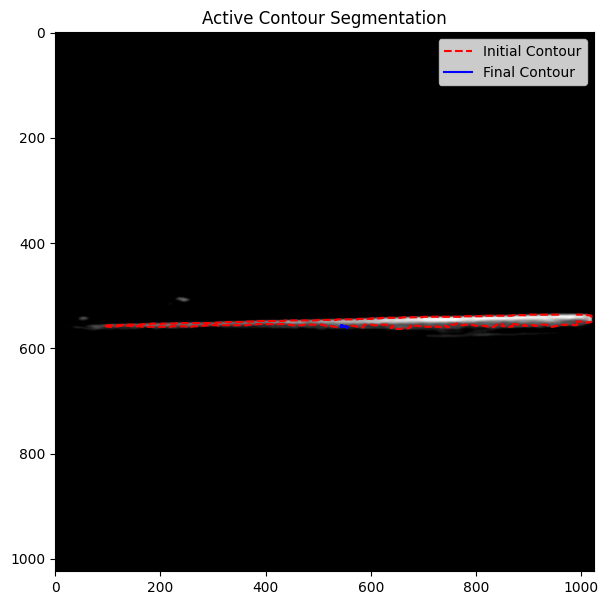

In [36]:
total_images = 0
accuracies = []
for image_dir, gtmask_dir in zip(images_dict, gtmasks_dict):
    for image_name, gtmask_name in zip(images_dict[image_dir], gtmasks_dict[gtmask_dir]):
        im_path = os.path.join('..', get_image_path(image_dir, image_name))
        gtm_path = os.path.join('..', get_image_path(gtmask_dir, gtmask_name))
        
        img = cv.imread(im_path)
        # Create gray scale image
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        gtm_image = cv.imread(gtm_path, cv.IMREAD_GRAYSCALE)
        # Filter image top
        img[0:176, :] = 0
        gtm_image[0:176, :] = 0
        display_image(img, "img")
        _, imgThreshold = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
        display_image(imgThreshold, "im trhsh")

        # Create RGB iamge
        # imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        edges = cv.Canny(img, 180, 190)  # Adjust thresholds based on the image
        plt.imshow(edges, cmap='gray')
        plt.title('Edge Detection')
        plt.show()

        contours, _ = cv.findContours(imgThreshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv.contourArea)
        init = largest_contour[:, 0, :]  # Convert to [x, y] format
        # # Define initial snake contour
        # s = np.linspace(0, 2*np.pi, 400)
        # x = 220 + 100*np.cos(s)
        # y = 100 + 100*np.sin(s)
        # init = np.array([x, y]).T

        # Perform active contour segmentation
        snake = active_contour(img, init, alpha=0.015, beta=10, gamma=0.001)

        # Visualize the result
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.imshow(img, cmap=plt.cm.gray)
        ax.plot(init[:, 0], init[:, 1], '--r', label='Initial Contour')
        ax.plot(snake[:, 0], snake[:, 1], '-b', label='Final Contour')
        ax.legend(loc='best')
        plt.title('Active Contour Segmentation')
        plt.show()
        
        break
    break
        

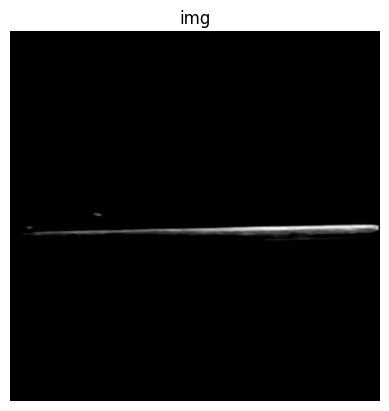

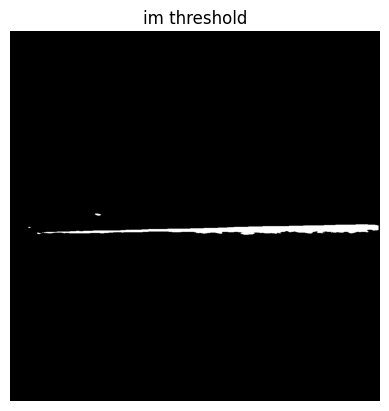

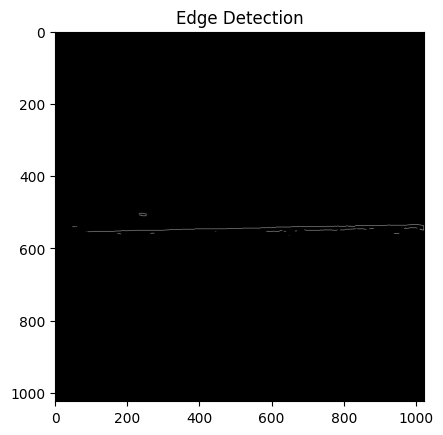

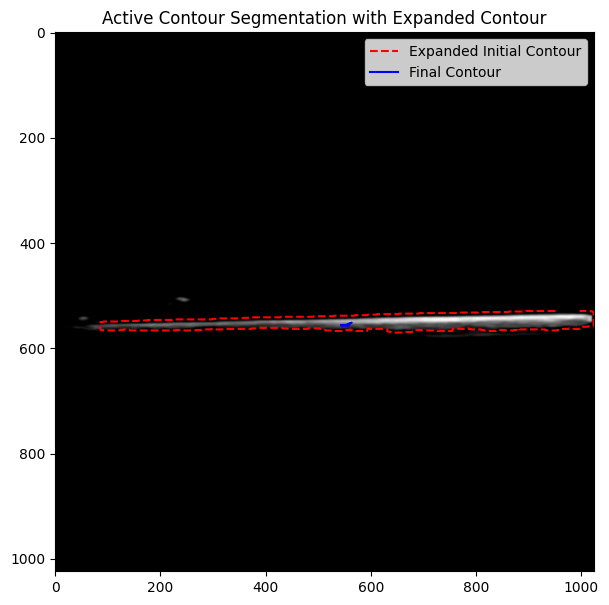

In [37]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.segmentation import active_contour

total_images = 0
accuracies = []

for image_dir, gtmask_dir in zip(images_dict, gtmasks_dict):
    for image_name, gtmask_name in zip(images_dict[image_dir], gtmasks_dict[gtmask_dir]):
        im_path = os.path.join('..', get_image_path(image_dir, image_name))
        gtm_path = os.path.join('..', get_image_path(gtmask_dir, gtmask_name))

        img = cv.imread(im_path)
        # Create gray scale image
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        gtm_image = cv.imread(gtm_path, cv.IMREAD_GRAYSCALE)
        # Filter image top
        img[0:176, :] = 0
        gtm_image[0:176, :] = 0
        display_image(img, "img")
        _, imgThreshold = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
        display_image(imgThreshold, "im threshold")

        # Edge detection
        edges = cv.Canny(img, 180, 190)  # Adjust thresholds based on the image
        plt.imshow(edges, cmap='gray')
        plt.title('Edge Detection')
        plt.show()

        contours, _ = cv.findContours(imgThreshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv.contourArea)
        init = largest_contour[:, 0, :]  # Convert to [x, y] format

        # Create a blank mask for dilation
        mask = np.zeros_like(img)
        cv.drawContours(mask, [largest_contour], -1, (255), thickness=cv.FILLED)

        # Dilation to expand the contour
        kernel = np.ones((15, 15), np.uint8)  # Size of the dilation kernel (adjust as needed)
        expanded_mask = cv.dilate(mask, kernel, iterations=1)

        # Find contours in the dilated mask to get the expanded contour
        expanded_contours, _ = cv.findContours(expanded_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        largest_expanded_contour = max(expanded_contours, key=cv.contourArea)

        # Convert the expanded contour to [x, y] format
        expanded_init = largest_expanded_contour[:, 0, :]

        # Perform active contour segmentation with the expanded contour as initial contour
        snake = active_contour(img, expanded_init, alpha=0.015, beta=10, gamma=0.001)

        # Visualize the result
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.imshow(img, cmap=plt.cm.gray)
        ax.plot(expanded_init[:, 0], expanded_init[:, 1], '--r', label='Expanded Initial Contour')
        ax.plot(snake[:, 0], snake[:, 1], '-b', label='Final Contour')
        ax.legend(loc='best')
        plt.title('Active Contour Segmentation with Expanded Contour')
        plt.show()

        break  # To handle only one image, remove if you want to process all images
    break  # To handle only one image, remove if you want to process all images


### Fast Marching Method